# CM3005 Data Science Midterm-Heart Prediction Analysis

## I.Introduction

Assessing humans vital indicators, such as their blood pressure, cholesterol, blood sugar levels and so on and so forth helps undersatnd the reaons resulting in heart disease or death caused to heart failure.

# 1.Introduction to the domain-specfic area

Heart is the pumping organ for the body but an factors which can affect the heart functioning can result in developing heart disease or worse heart failure.According to data from the World Health Organization, cardiovascular illnesses are currently the leading source of mortality globally, accounting for 17.9 million fatalities per year. Heart attacks and strokes account for four out of every five CVD fatalities, and one-third of these deaths happen before the age of 70.[1]

Increased risk factors for heart disease include unhealthy behaviors such as high cholesterol, obesity, a rise in triglyceride levels, hypertension, etc. Good health pattern should be maitained by each and every human being in order to live a flourishing life. Since certain symptoms, such as swollen legs, trouble sleeping, irregular heartbeats, etc., are similar to those of other diseases and affect both middle-aged and young adults as well as older adults, it can be challenging to make a proper diagnosis, which can lead to death in the near future.

In my analysis I will examine the important barometers of humans in pursuance of the heart disease issues. 

# 2.Description of the selected dataset

I am aiming to investigate a health condition that mostly raises the risk of heart disease,therfore selecting this dataset.

This dataset consists of information like their gender, cholestrol, blood pressure, age, restingECG, and heart disease rates etc. 
This is very relevant to my research since an exploratory analysis of the data would demonstrate the correlation between each health issue and the chance of developing heart disease in individuals. The findings of this evaluation will then be applied to identify which medical condition has the most influence on heart disease rates.

This dataset was produced by fusing many datasets that have previously existed separately. The largest heart disease dataset currently accessible for research purposes is comprised of 5 heart datasets pooled across 11 shared characteristics. The five datasets that it curated from are:
- Stalog Data Set
- Long Beach VA Data Set
- Hungarian Data Set
- Cleveland Data Set
- Switzerland Data Set

This dataset comprises 12 variables that can be used to predict a potential heart illness. Heart failure is a common occurrence brought on by CVDs.Because of its relevance and design, the chosen dataset is suitable for addressing my research topic for this project.

Following is the description of the colums presnet in the dataset:
- Age: age in years
- Gender:gender [M:male, F:Female]
- ChestPainType: type of chest pain[TA:typical Angina,ASY:asymptomatic,NAmp:Non-Anginal Pain,ATA:Atyptical Angina]
- RestingBP: resting blood pressure measured in mmHG
- Cholestrol: cholestrol levels measured in mm/dl
- RestingECG:electrocardiogram results[Normal:Normal, ST:wave abnormality]
- MaxHR: maximum heat rate[60-202]
- ExerciseAngina:exercise-induced anagina 
- Oldpeak:old peak of the ECG results
- ST_slope: slope of the peak-exercise segment
- HeartDiease:presence of heart disaease[0:No,1:Yes]

# 3.Objectives of the project

In order to do this research, I want to look into and identify the main factors of heart disease. I'll do this by looking at information about human health, such as age, gender, BP, restingECG, MaxHR, FastingBS, heart disease rates, ExerciseAngina, Oldpeak, ST Slope, chest discomfort, and RestingBP measures. I would want to use the dataset to ask or obtain answers to some of the following questions.

1. Does blood pressure increase the chance of heart disease?
2. At what age does heart failure occur frequently?
3. Which gender is at a higher risk of getting heart failure?

I want to find and look into these patterns by gathering relevant data, modifying and rearranging the chosen dataset, and doing an exploratory analysis on the supplied data.

# II.Implementation

## 4.Pre-processing

Required modules and libraries are imported.

In [1]:
#Importing the required modules
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
# ignoring unnecessary warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the csv
import csv

I chose the suitable csv file which contains all the relevant data for this analysis and named it as "heart.csv".Pandas library is used here because it allows data from a variety of file formats to be imported into a dataframe.

In [3]:
#read the csv file
datafr=pd.read_csv("heart.csv")
datafr.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#renaming the data
datafr = datafr.rename(
    {
        'Age': 'age',
        'RestingBP': 'resting_bp',
        'Cholesterol': 'cholesterol',
        'FastingBS': 'fasting_bs',
        'MaxHR': 'max_hr',
        'Oldpeak': 'oldpeak',
        'HeartDisease': 'heart_disease',
        'Sex': 'gender',
        'ChestPainType': 'chest_pain_type',
        'RestingECG': 'resting_ecg',
        'ExerciseAngina': 'exercise_angina',
        'ST_Slope': 'st_slope'
    },
    axis=1)
datafr.head()

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
#getting information on datatypes of columns in the dataset
datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              918 non-null    int64  
 1   gender           918 non-null    object 
 2   chest_pain_type  918 non-null    object 
 3   resting_bp       918 non-null    int64  
 4   cholesterol      918 non-null    int64  
 5   fasting_bs       918 non-null    int64  
 6   resting_ecg      918 non-null    object 
 7   max_hr           918 non-null    int64  
 8   exercise_angina  918 non-null    object 
 9   oldpeak          918 non-null    float64
 10  st_slope         918 non-null    object 
 11  heart_disease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
datafr.describe(include = 'O')

,gender,chest_pain_type,resting_ecg,exercise_angina,st_slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


From the above table we can understand the types of unique values, value with most frequnecy and its frequency rate.

<b>Check for null values</b>

Subsequently,I will be checking for null or missing values as the presence of these values could result in inaccuarte results or a biased conclusion.

In [7]:
#checking the null values
datafr.isnull()

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


Although the table mostly displays 'False,' indicating that no entry is null, checking each column and obtaining the sum of missing values in them provides a clearer indication of the absence of missing values. The code below demonstrates that there are no missing values in any column. We now know that there are no null values in the csv file's datafields. This simplifies our analysis.

In [8]:
datafr.isnull().sum()

age                0
gender             0
chest_pain_type    0
resting_bp         0
cholesterol        0
fasting_bs         0
resting_ecg        0
max_hr             0
exercise_angina    0
oldpeak            0
st_slope           0
heart_disease      0
dtype: int64

We can conclude that there are no null values present in the dataset.

Converting object datatypes into category datatypes

In [9]:
cat_cols = list(datafr.select_dtypes('object').columns) + ['fasting_bs']

datafr[cat_cols[:-1]] = datafr.select_dtypes('object').astype('category')
datafr[['fasting_bs']] = datafr[['fasting_bs']].astype('category')

num_cols = list(datafr.select_dtypes(exclude='category').columns)

In [10]:
#getting information on datatypes of columns in the dataset
datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              918 non-null    int64   
 1   gender           918 non-null    category
 2   chest_pain_type  918 non-null    category
 3   resting_bp       918 non-null    int64   
 4   cholesterol      918 non-null    int64   
 5   fasting_bs       918 non-null    category
 6   resting_ecg      918 non-null    category
 7   max_hr           918 non-null    int64   
 8   exercise_angina  918 non-null    category
 9   oldpeak          918 non-null    float64 
 10  st_slope         918 non-null    category
 11  heart_disease    918 non-null    int64   
dtypes: category(6), float64(1), int64(5)
memory usage: 49.4 KB


#### Removing outliers
I will be removing outliers

In [11]:
#outliers have been removed
datafr[datafr['resting_bp']==0]

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [12]:
datafr=datafr.drop(datafr[datafr['resting_bp']==0].index)

cholestrol==0

In [13]:
datafr[datafr['cholesterol']==0]

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,oldpeak,st_slope,heart_disease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [14]:
datafr=datafr.drop(datafr[datafr['cholesterol']==0].index)

In [15]:
datafr["heart_disease"] = datafr["heart_disease"].map({0: "No", 1: "Yes"})

As we are done with Pre-processing, now we can start our analysis.

# 5.Statistical Analysis

This part of the analysis involves computing the mean, median, skewness, standard deviation, and kurtosis in order to better visualise the health risks. Firstly, I will calculate gender standard deviations, followed by gender counts, then I will calculate the other statistical measures.

In [16]:
gender_counts = datafr["gender"].value_counts(normalize=True).round(2) * 100
gender_counts = gender_counts.reset_index().rename(columns={"gender": "Count", "index": "gender"})
gender_counts

,gender,Count
0,M,76.0
1,F,24.0


We can see that the majority of this data are males.

In [17]:
Chol_mean_f = (
    datafr[["gender", "cholesterol"]]
    .groupby(["gender"])
    .mean("cholesterol")
    .loc["F", "cholesterol"]
).round()
Chol_mean_m = (
    datafr[["gender", "cholesterol"]]
    .groupby(["gender"])
    .mean("cholesterol")
    .loc["M", "cholesterol"]
).round()

print("for Female =", Chol_mean_f, "for Male =", Chol_mean_m)

for Female = 256.0 for Male = 241.0


In [18]:
ChestPainType_vs_gender = (
    datafr[["chest_pain_type", "gender"]]
    .value_counts(normalize=True)
    .reset_index(name="count")
    .sort_values(by="chest_pain_type")
)
ChestPainType_vs_gender["count"] = ChestPainType_vs_gender["count"].round(2) * 100
ChestPainType_vs_gender

,chest_pain_type,gender,count
0,ASY,M,41.0
3,ASY,F,8.0
2,ATA,M,14.0
4,ATA,F,8.0
1,NAP,M,16.0
5,NAP,F,7.0
6,TA,M,4.0
7,TA,F,1.0


In [19]:
HeartDisease_counts = (
    datafr[["heart_disease"]]
    .value_counts(normalize=True)
    .reset_index(name="count")
    .sort_values(by="heart_disease")
)
HeartDisease_counts["count"] = HeartDisease_counts["count"].round(2) * 100
HeartDisease_counts

,heart_disease,count
0,No,52.0
1,Yes,48.0


In [20]:
#getting the mean value for the data
datafr.mean()

age             52.882038
resting_bp     133.022788
cholesterol    244.635389
max_hr         140.226542
oldpeak          0.901609
dtype: float64

In [21]:
#finding the largest value of age
datafr['age'].nlargest(n=5)

447    77
814    77
541    76
688    76
491    75
Name: age, dtype: int64

In [22]:
#finding the smallest value of age
datafr['age'].nsmallest(n=5)

208    28
170    29
219    29
829    29
215    30
Name: age, dtype: int64

In [23]:
#finding the largest value of resting_bp
datafr['resting_bp'].nlargest(n=5)

241    200
732    200
759    192
109    190
592    190
Name: resting_bp, dtype: int64

In [24]:
#finding the smallest value of resting_bp
datafr['resting_bp'].nsmallest(n=5)

227    92
692    94
832    94
519    96
267    98
Name: resting_bp, dtype: int64

In [25]:
#finding the largest value of cholesterol
datafr['cholesterol'].nlargest(n=5)

149    603
616    564
76     529
30     518
250    491
Name: cholesterol, dtype: int64

In [26]:
##finding the smallest value of cholesterol
datafr['cholesterol'].nsmallest(n=5)

98      85
78     100
444    100
571    110
541    113
Name: cholesterol, dtype: int64

In [27]:
#finding the largest value of max_hr
datafr['max_hr'].nlargest(n=5)

829    202
759    195
795    194
753    192
126    190
Name: max_hr, dtype: int64

In [28]:
#finding the smallest value of max_hr
datafr['max_hr'].nsmallest(n=5)

496    69
716    71
550    73
507    80
68     82
Name: max_hr, dtype: int64

In [29]:
#finding the largest value of oldpeak
datafr['oldpeak'].nlargest(n=5)

850    6.2
771    5.6
166    5.0
900    4.4
702    4.2
Name: oldpeak, dtype: float64

In [30]:
#finding the smallest value of oldpeak
datafr['oldpeak'].nsmallest(n=5)

512   -0.1
0      0.0
2      0.0
4      0.0
5      0.0
Name: oldpeak, dtype: float64

Now I am finding the "sum","mean","min","max","median" for the data

In [31]:
#calculating the sum, mean, min, max, median
datafr.agg(["sum","mean","min","max","median"])

,age,resting_bp,cholesterol,max_hr,oldpeak,heart_disease
sum,39450.000000,99235.000000,182498.000000,104609.000000,672.600000,NoYesNoYesNoNoNoNoYesNoNoYesNoYesNoNoYesNoYesY...
mean,52.882038,133.022788,244.635389,140.226542,0.901609,NaN
min,28.000000,92.000000,85.000000,69.000000,-0.100000,No
max,77.000000,200.000000,603.000000,202.000000,6.200000,Yes
median,54.000000,130.000000,237.000000,140.000000,0.500000,NaN


Finding the standard deviation value for data

In [32]:
#getting the standard deviation value
datafr.std()

age             9.505888
resting_bp     17.282750
cholesterol    59.153524
max_hr         24.524107
oldpeak         1.072861
dtype: float64

Finding the skewness value for data

In [33]:
#getting the skewness value
datafr.skew()

age           -0.102932
resting_bp     0.620070
cholesterol    1.238534
max_hr        -0.165167
oldpeak        1.219448
dtype: float64

Finding the kurtosis value for data

In [34]:
#getting the kurtosis value
datafr.kurt()

age           -0.387425
resting_bp     0.742820
cholesterol    4.528592
max_hr        -0.552428
oldpeak        1.362139
dtype: float64

From above we can see that the kurt whci is negative for three values which means they are flat. We can get a better understanding when we start visualising these fields in the following code.

# 6.Data Visualization

In [35]:
#importing required modules and libraries
import seaborn as sns
import matplotlib.pyplot as plt

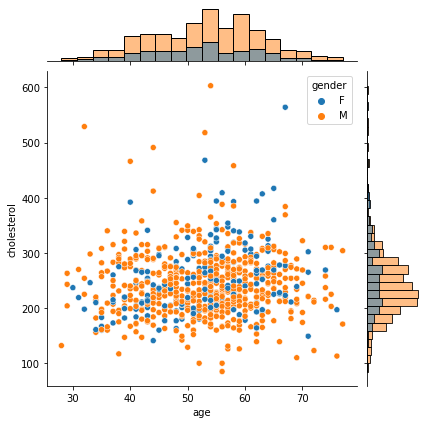

In [36]:
filtheart_dft = datafr["cholesterol"] > 0
heart_dft_chol_n0 = datafr[filtheart_dft]

sns.JointGrid(
    data=datafr, x="age", y="cholesterol", hue="gender").plot(sns.scatterplot, sns.histplot)
plt.show()

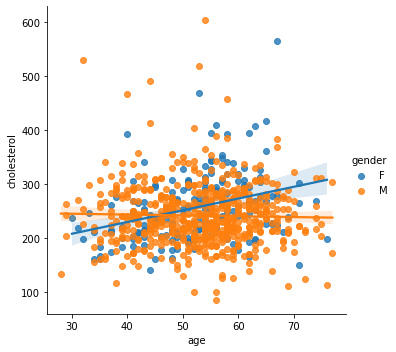

In [37]:
sns.lmplot(
    data=heart_dft_chol_n0,
    x="age",
    y="cholesterol",
    hue="gender",
).set(ylabel="cholesterol", xlabel="age", title="")
plt.show()

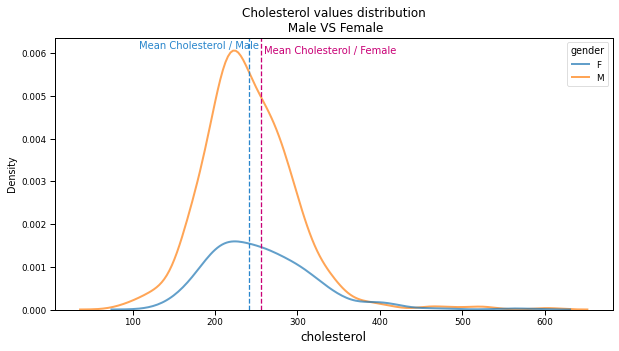

In [38]:
plt.figure(figsize=(10, 5))
sns.set_context("paper")

kdeplt = sns.kdeplot(
    data=heart_dft_chol_n0,
    x="cholesterol",
    hue="gender",
    alpha=0.7,
    lw=2,
)
kdeplt.set_title("Cholesterol values distribution\n Male VS Female", fontsize=12)
kdeplt.set_xlabel("cholesterol", fontsize=12)


plt.axvline(x=Chol_mean_f, color="#c90076", ls="--", lw=1.3)
plt.axvline(x=Chol_mean_m, color="#2986cc", ls="--", lw=1.3)
plt.text(108, 0.00612, "Mean Cholesterol / Male", fontsize=10, color="#2986cc")
plt.text(260, 0.006, "Mean Cholesterol / Female", fontsize=10, color="#c90076")


plt.show()

Based on the above plot we can see men have a cholesterol than women but this could be a result of the dataset having majority of males, we'll Continue exploring and visualising.

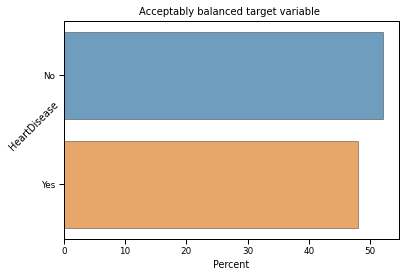

In [39]:
hplt = sns.barplot(
    data=HeartDisease_counts,
    x="count",
    #errorbar=None,
    y="heart_disease",
    linewidth=0.5,
    edgecolor="black",
    alpha=0.7,
)

hplt.set_ylabel("HeartDisease", rotation=45)
hplt.set_xlabel("Percent")
hplt.set_title("Acceptably balanced target variable ", fontsize=10)
plt.show()

In [40]:
HeartDisease_by_Sex = (
    datafr.groupby(["gender"])["heart_disease"]
    .value_counts(normalize=True)
    .reset_index(name="count")
).rename(columns={"level_1": "HeartDisease"})

HeartDisease_by_Sex["count"] = HeartDisease_by_Sex["count"].round(2) * 100

HeartDisease_by_Sex

,gender,heart_disease,count
0,F,No,78.0
1,F,Yes,22.0
2,M,Yes,56.0
3,M,No,44.0


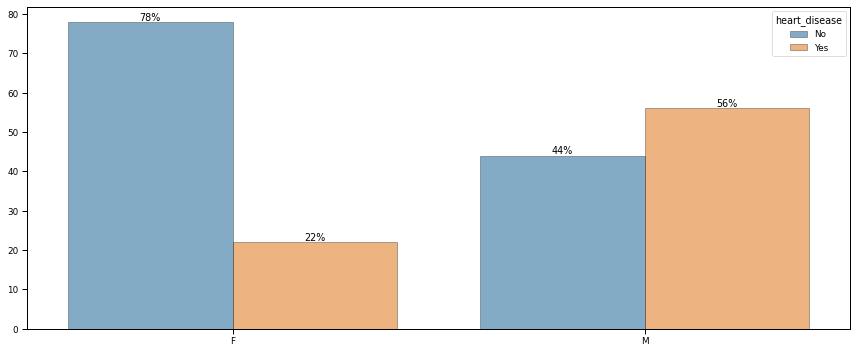

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

hplt = sns.barplot(
    data=HeartDisease_by_Sex,
    x="gender",
    y="count",
    hue="heart_disease",
    linewidth=0.5,
    edgecolor="black",
    alpha=0.6,
    ax=ax,
)

for axhs in [ax]:
    for container in axhs.containers:
        values_hs = container.datavalues
        labels = ["{:g}%".format(val) for val in values_hs]
        axhs.bar_label(container, labels=labels)

ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("", fontsize=10)


plt.tight_layout()
plt.show()

plt.show()

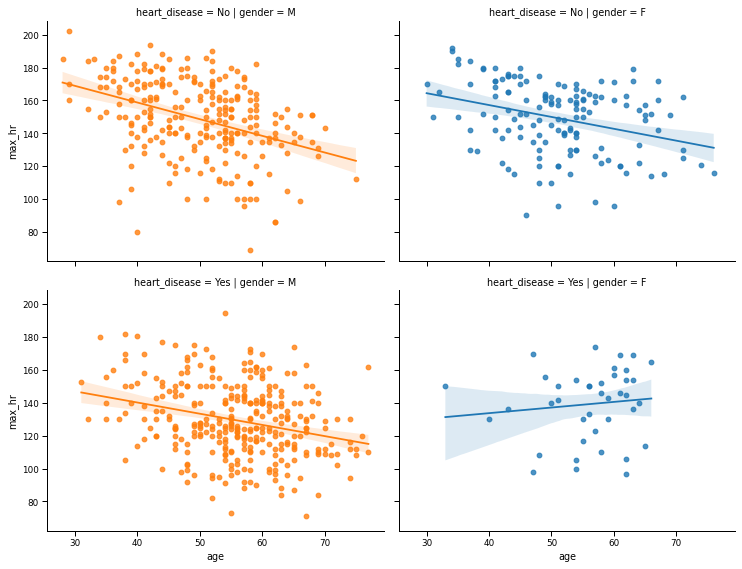

In [42]:
heart_df_fg = sns.FacetGrid(
    data=datafr,
    col="gender",
    hue="gender",
    row="heart_disease",
    height=4,
    aspect=1.3,
    col_order=["M", "F"],
)
heart_df_fg.map_dataframe(sns.regplot, "age", "max_hr")
plt.show()

Text(0.5, 1.0, 'Distribution of Heart Diseases over Age')

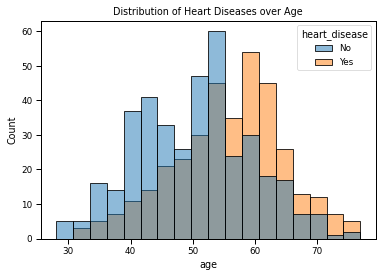

In [43]:
sns.histplot(data = datafr ,x = 'age', hue = 'heart_disease')
plt.title("Distribution of Heart Diseases over Age")

We can see most of the effected people are of the between 50-70 though that doesnt mean young people are in the safe. There is an alarming number of people under the age of 40 being effected.

Text(0.5, 1.0, 'Distribution of Heart Diseases over RestingECG')

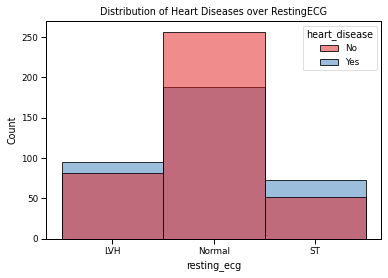

In [44]:
sns.histplot(data = datafr ,x = 'resting_ecg', hue = 'heart_disease',palette = 'Set1')
plt.title("Distribution of Heart Diseases over RestingECG")

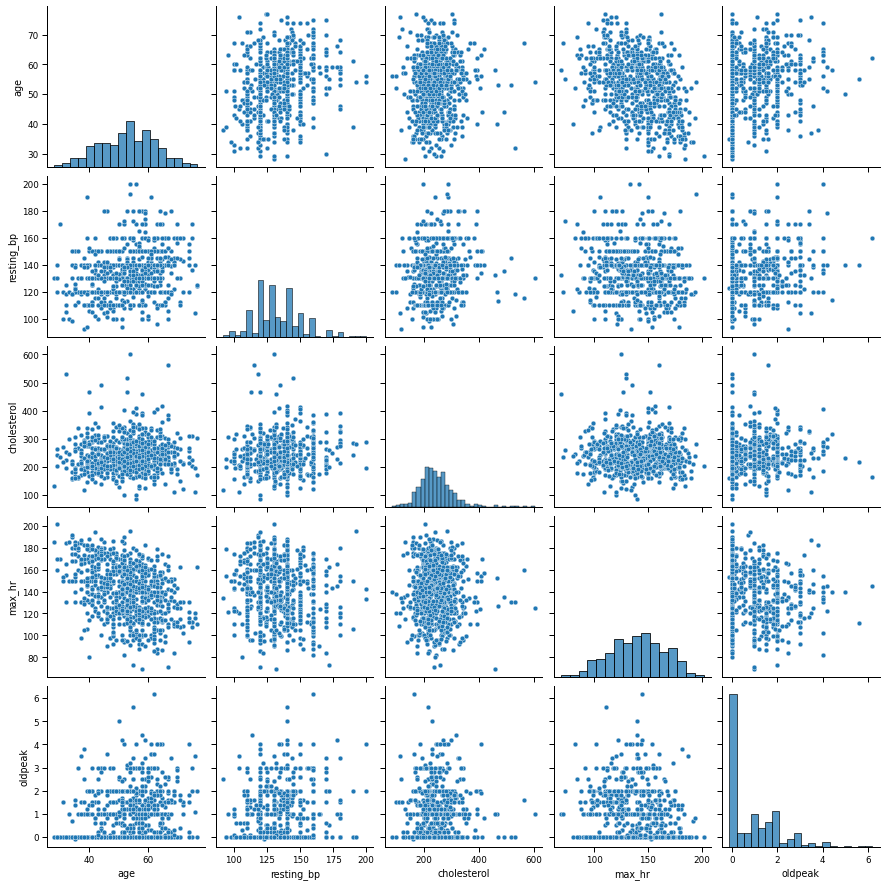

In [45]:
sns.pairplot(datafr)

### check the distribution and skewness of the features

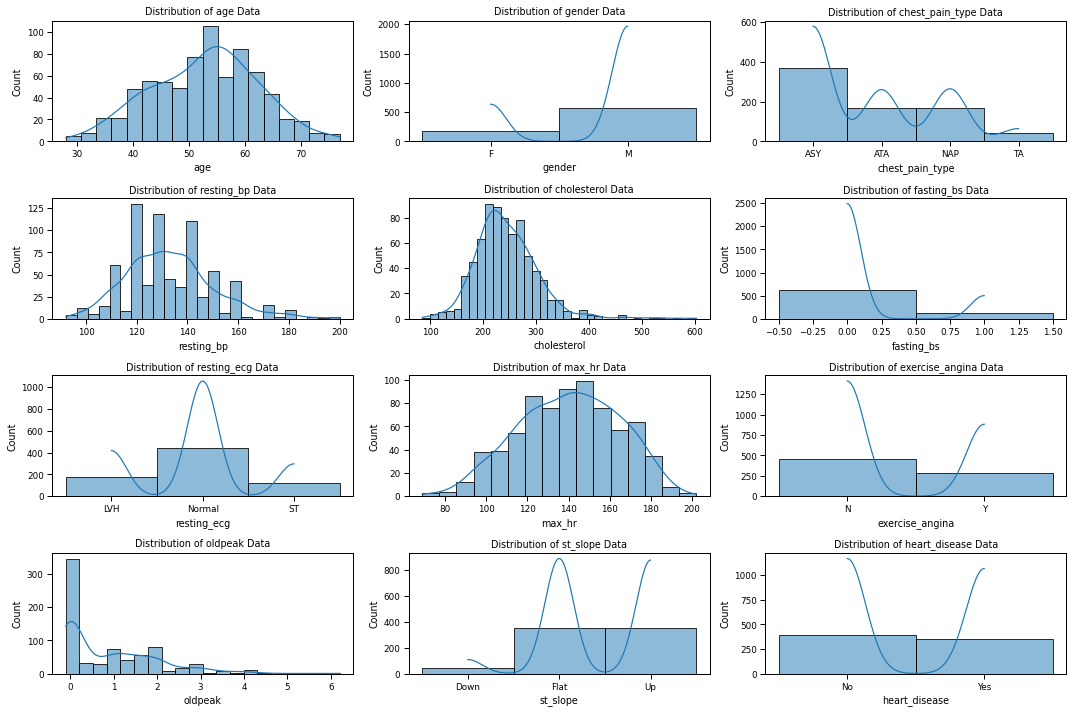

In [46]:
plt.figure(figsize=(15,10))
for i,col in enumerate(datafr.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(datafr[col],kde=True)
    plt.tight_layout()
    plt.plot()

# 7.Building ML model

In [47]:
#importing required modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

Model 1- Age vs fasting_bs

In [48]:
#setting the X1 and y1 values
X1=datafr['age'].values
y1=datafr['fasting_bs'].values

In [49]:
#reshaping the X1 values
X1=np.reshape(X1,[-1, 1])

In [50]:
#splitting the data by testing and training X1 and y1 values
X_train,X_test,y_train,y_test=train_test_split(X1,y1,random_state=42,test_size=0.3)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (522, 1)
Shape of X_test: (224, 1)


In [51]:
#by passing through the linear regression r2 regressor is obtained
r2_regressor=LinearRegression()
r2_regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [52]:
y_predict = r2_regressor.predict(X_test)

In [53]:
#finding the regressor score
r2_regressor.score(X_test, y_test)

0.05854593396664631

In [54]:
#finding the regressor intercept
r2_regressor.intercept_

-0.33228438343957967

In [55]:
#finding the regressor coefficient
r2_regressor.coef_

array([0.00949011])

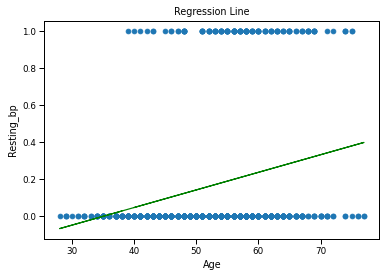

In [56]:
#Plotting the regression line graph
line = r2_regressor.coef_[0]*X1[:,0]+r2_regressor.intercept_

# Plotting for the test data
plt.scatter(X1[:,0], y1)
plt.plot(X1[:,0], line, color='green');
plt.xlabel('Age')
plt.ylabel('Resting_bp')
plt.title('Regression Line')
plt.show()

Model 2-Age vs Maximum heart rate

In [57]:
#setting the X1 and y1 values
X2=datafr['age'].values
y2=datafr['max_hr'].values

#reshaping the X2 values
X2=np.reshape(X2,[-1, 1])

In [58]:
#splitting the data by testing and training X1 and y1 values
X_train,X_test,y_train,y_test=train_test_split(X2,y2,random_state=42,test_size=0.3)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (522, 1)
Shape of X_test: (224, 1)


In [59]:
#by passing through the linear regression r2 regressor is obtained
r2_regressor=LinearRegression()
r2_regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [60]:
y_predict = r2_regressor.predict(X_test)

In [61]:
#finding the regressor score
r2_regressor.score(X_test, y_test)

0.13467804626584634

In [62]:
#finding the regressor intercept
r2_regressor.intercept_

193.4654706081445

In [63]:
#finding the regressor coefficient
r2_regressor.coef_

array([-0.99985393])

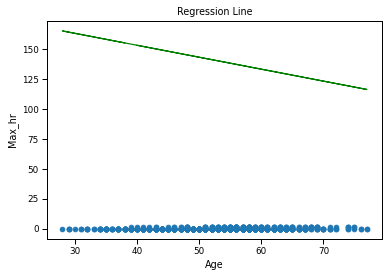

In [64]:
#Plotting the regression line graph
line = r2_regressor.coef_[0]*X2[:,0]+r2_regressor.intercept_

# Plotting for the test data
plt.scatter(X2[:,0], y1)
plt.plot(X2[:,0], line, color='green');
plt.xlabel('Age')
plt.ylabel('Max_hr')
plt.title('Regression Line')
plt.show()

# Random forest and decision tree

In [65]:
#Importing Libraries required for cross-validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score, f1_score

In [66]:
#getting the decision tree score by splitting data and and doing the training and testing process
X = datafr['cholesterol'].values
y = datafr['fasting_bs'].values
X = np.reshape(X,[-1, 1])
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

predictions_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test) * 100

In [67]:
# getting random forest score by splitting data and and doing the training and testing process
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)

predictions_random_forest = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, y_test) * 100

In [68]:
#printing the decision tree and random forest scores
print("Decision Tree score: ",decision_tree_score)
print("Random Forest score: ",random_forest_score)

Decision Tree score:  79.91071428571429
Random Forest score:  78.57142857142857


In [69]:
#definig the metrics
def metrics(actuals,predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals,predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals,predictions,average='weighted')))
    print("Recall: {:.5f}".format(recall_score(actuals,predictions,average='weighted')))
    print("F1-score: {:.5f}".format(f1_score(actuals,predictions,average='weighted')))

In [70]:
#printing the metrics of decision Tree
print("Evaluation of Decision Tree Model")
metrics(y_test,predictions_dt)

Evaluation of Decision Tree Model
Accuracy: 0.79911
Precision: 0.74367
Recall: 0.79911
F1-score: 0.76465


In [71]:
#printing the metrics of random forest
print("Evaluation of Random Forests Model")
metrics(y_test,predictions_random_forest)

Evaluation of Random Forests Model
Accuracy: 0.78571
Precision: 0.72685
Recall: 0.78571
F1-score: 0.75147


## III. Conclusions

### 9. Results of the ML model

I have generated a ML model for the maternal health risk based on the values of 'age', 'fasting_bp' and
'age', 'max_hr'.
- 'age', 'fasting_bp' Regressor score : 0.0585
- 'age', 'max_hr' Regressor score : 0.1346

When comparing both the regressor values and we can observe that the 'age', 'max_hr' have the bettter regressor score than 'age','fasting_bs'.

Based on the values of "cholestrol" and "fasting bs," I created an ML model for the risk of heart disease. The scikit-learn library was used to train and evaluate the data in this. My regressor score was 0.069, which is decent. Using random forest and decision trees, we should now assess the model's accuracy, precision, recall, and F1-score.

- Accuracy: 0.78125
- Precision: 0.73281
- Recall: 0.78125
- F1-score: 0.75338

The results of evaluating all of the above have given me ratings that indicate how well the model predicts the risk of heart disease in humans. As a result, people can attempt to reduce their risk of developing heart disease by taking preventative measures.

### 10. Evaluation of the project and its results

The effort has produced excellent results. We were successful in acquiring all of the necessary outcomes to achieve our objectives and much more. The overall research revealed that numerous factors such as cholesterol and blood pressure do cause heart disease.

We discovered that each vital indicator related to the threats to haert health in some way. Cholestrol, blood pressure and heart rate had a stronger influence on causing heart disease. After performing more research on the three vital signs, we determined that serum cholestrol levels must be examined and maintained more carefully than the other vital indicators.

We learned the answers to our specific questions as a result of this:

1. Does blood pressure increase the chance of heart disease?
2. At what age does heart failure occur frequently?
3. Which gender is at a higher risk of getting heart failure?

The answers of the following question are as follows

1. Blood pressure is proportional to the result of heart disease therefore, higher the blood pressure higher the risk of heart diseas/failure.
2. 53 is the age where heart failure ocuurs more frequently. 
3. Males have higher chance of risk of heart failure.

However, conclusions from this project's study should not be relied on heavily because they are simply discoveries from the dataset's investigation. A far larger scale of investigation is required before reaching conclusions about the dataset that can be relied on and accepted.

<b>Referneces</b>
<ol>
    <li>[1]-World Health Organization
        https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1</li>

   <li>[2]-Dataset
    https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction</li>
</ol>